#**GNNs Lab Notebook 1**
#Tools and Introduction to Graph Learning

---

This notebook will cover fundamental concepts in Graph Learning, Similarity Computation, and Graph Neural Networks. Additionally, we will introduce essential tools, including libraries like [NetworkX](https://networkx.org/documentation/stable/), [PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/), and [GraKeL](https://github.com/ysig/GraKeL), to assist in these tasks.

In [ ]:
#!pip install -U numpy
!pip install -U matplotlib
!pip install -U networkx
!pip install -U GraKeL
!pip install -U torch_geometric

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import grakel
from itertools import chain

##Networkx

NetworkX is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and function of complex networks.

With NetworkX you can load and store networks in standard and nonstandard data formats, generate many types of random and classic networks, analyze network structure, build network models, design new network algorithms, draw networks, and much more.

Find additional information in this [Networkx tutorial notebook](https://colab.research.google.com/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/libraries/NetworkX.ipynb#scrollTo=zA1OO6huHeV6) and [corresponding document](https://networkx.org/documentation/networkx-1.9.1/_downloads/networkx_tutorial.pdf).

### Creating a graph

Create an empty graph with no nodes and no edges. You can use nx.Graph() for undirected graphs and nx.DiGraph() for directed ones.

In [ ]:
G = nx.Graph()

A Graph is a collection of nodes along with identified pairs of nodes (edges). In NetworkX, nodes can be any *hashable* object e.g. a text string, an image, an XML object, another Graph, a customized node object, etc.

(Note: Python’s None object should not be used as a node as it determines whether
optional function arguments have been assigned in many functions.)

To instantiate the graph, we add nodes and edges and define their types (if available).

Remember G is undirected so added edges do not have a specific direction.

In [ ]:
#Nodes can be added one by one
G.add_node(1, gender = 'Ken')

#or all together
G.add_nodes_from([
    (2, {'gender': 'Ken'}),
    (3, {'gender': 'Barbie'}),
    (4, {'gender': 'Ken'}),
    (5, {'gender': 'Barbie'})
])

In [ ]:
#same goes for edges

G.add_edge(1, 2, relationship = 'rivals')
e = (4, 2)
G.add_edge(*e, relationship = 'friends')

G.add_edges_from([
    (3, 2, {'relationship': 'couple'}),
    (4, 5, {'relationship': 'friends'}),
    (5, 3, {'relationship': 'friends'})
])

The graph has been created! We can automatically compute basic metrics.

In [ ]:
nx.adjacency_matrix(G).todense()

array([[0, 1, 0, 0, 0],
       [1, 0, 1, 1, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 0, 1],
       [0, 0, 1, 1, 0]])

In [ ]:
G.degree(2)

3

In [ ]:
print('Neighbors of node 2: ', list(G.neighbors(2)))

Neighbors of node 2:  [1, 4, 3]


Accessing the graph's node and edge lists as well as their respective information is very useful.

In [ ]:
#accesing nodes and edges
print('A list of nodes:', G.nodes())
print('A list of nodes and their info:', G.nodes(data=True))
print()
print('A list of edges:', G.edges())
print('A list of edges and their info:', G.edges(data=True))

A list of nodes: [1, 2, 3, 4, 5]
A list of nodes and their info: [(1, {'gender': 'Ken'}), (2, {'gender': 'Ken'}), (3, {'gender': 'Barbie'}), (4, {'gender': 'Ken'}), (5, {'gender': 'Barbie'})]

A list of edges: [(1, 2), (2, 4), (2, 3), (3, 5), (4, 5)]
A list of edges and their info: [(1, 2, {'relationship': 'rivals'}), (2, 4, {'relationship': 'friends'}), (2, 3, {'relationship': 'couple'}), (3, 5, {'relationship': 'friends'}), (4, 5, {'relationship': 'friends'})]


Visualizing the created graph...

In [ ]:
#Choose how to organize the nodes on 2D plane
#networkx offers many layouts to suit each graph

pos = nx.spring_layout(G, seed=42)

In [ ]:
#Differentiate node colors based on node type
node_colors = {
    'Ken': 'lightblue',
    'Barbie': 'pink'
}

#Differentiate edge colors based on edge type
edge_colors = {
    'couple': 'green',
    'rivals': 'red',
    'friends': 'orange'
}

options = {
    'with_labels': True,
    'node_size': 2000,
    'node_color': [node_colors[G.nodes[n]['gender']] for n in G.nodes()],
    'width': 1.2,                              # edge width
    'edge_color': [edge_colors[G.edges[n]['relationship']] for n in G.edges()],
    'labels': dict(G.nodes(data="gender")),    # show Gender as label
    'font_size': 14,
}

options_edge_labels = {
    'label_pos': 0.5,
    'font_size': 9
}

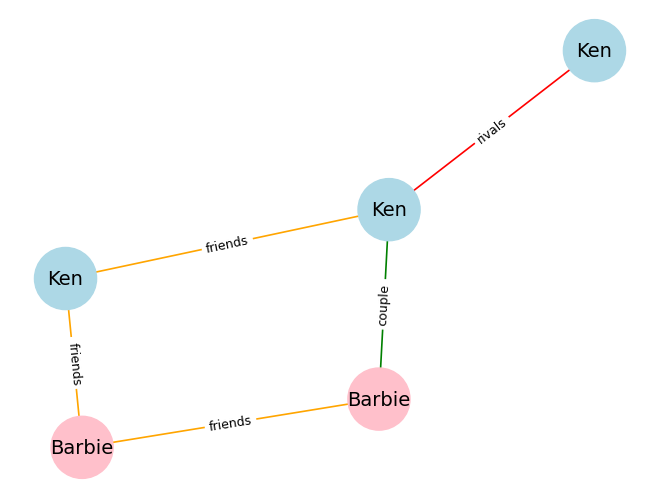

In [ ]:
nx.draw(G, pos, **options)

edge_labels = {(a,b):c for a,b,c in G.edges(data="relationship")}
nx.draw_networkx_edge_labels(G, pos, edge_labels, **options_edge_labels)

plt.show()

###Generating standard graphs

Networkx further provides the opportunity for easy creation of standard graphs.

In [ ]:
K_5 = nx.complete_graph(5) #complete graph of 5 nodes (K5)
P_5 = nx.path_graph(5) #path graph of 5 nodes (P5)
lollipop = nx.lollipop_graph(5, 5) #lollipop graph consisting of a K5 and a P5
K_3_5 = nx.complete_bipartite_graph(3, 5) #complete bipartite graph of partition sets of 3 and 5 nodes each
er = nx.erdos_renyi_graph(10, 0.15, seed=17) #random graph of 10 nodes, sparse (low p)
er2 = nx.erdos_renyi_graph(10, 0.75, seed=42) #random graph of 10 nodes, dense (high p)

We can easily visualize such graphs since no edge/node information is defined.

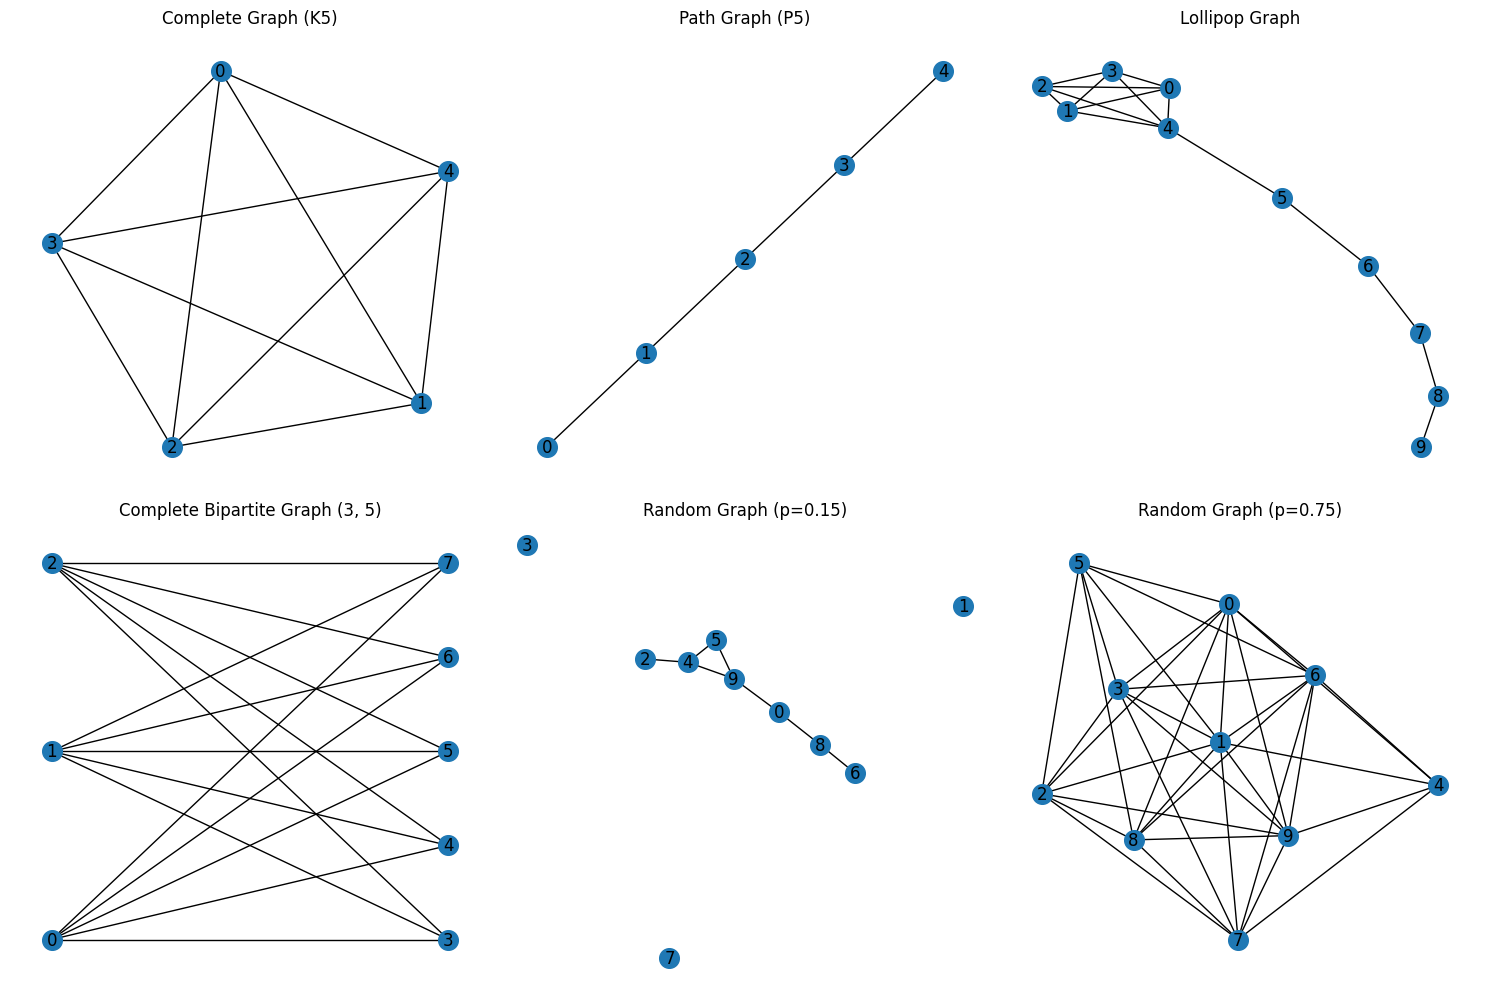

In [ ]:
# Create a list of graph objects
graphs = [K_5, P_5, lollipop, K_3_5, er, er2]
titles = ["Complete Graph (K5)", "Path Graph (P5)", "Lollipop Graph", "Complete Bipartite Graph (3, 5)", "Random Graph (p=0.15)", "Random Graph (p=0.75)"]
layouts = [nx.spring_layout(K_5, seed=42), {n: (n, n) for n in P_5}, nx.spring_layout(lollipop, seed=42), nx.bipartite_layout(K_3_5, list(K_3_5.nodes())[:3]), nx.spring_layout(er, seed=42), nx.spring_layout(er2, seed=42)]

# Create a subplot with two rows and three columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))


# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each graph and set titles
for i, (G, title) in enumerate(zip(graphs, titles)):
    ax = axes[i]
    pos = layouts[i]
    nx.draw(G, pos, with_labels=True, node_size=200, ax=ax)
    ax.set_title(title)

# Adjust layout spacing
plt.tight_layout()
plt.show()

More interesting graph statistics can be obtained. For example:
<br>
<br>

**Average Clustering Coefficient $(C_{avg})$** measures the degree to which nodes in a graph tend to cluster together, indicating the presence of small groups or communities. Mathematically:
\begin{align}
\text{Local Clustering Coefficient for Node } i: & \quad C(i) = \frac{\text{number of triangles containing node } i}{\text{number of connected triples centered on node } i} \\
\text{Average Clustering Coefficient for the Graph:} & \quad C_{\text{avg}} = \frac{\sum_{\text{all nodes}} C(i)}{N},
\end{align}
where $N$ is the number of nodes in the graph.
<br>
<br>

**Average Node Degree $(D_{avg})$** represents the average number of connections or edges per node in the graph. Mathematically:


\begin{align*}
\text{Average Node Degree for the Graph:} & \quad D_{\text{avg}} = \frac{\sum_{\text{all nodes}} (\text{degrees of all nodes})}{N},
\end{align*}
where $N$ is the number of nodes in the graph.


In [ ]:
for i, G in enumerate(graphs):
    avg_clustering = nx.average_clustering(G)
    avg_degree = sum(dict(G.degree()).values()) / len(G)
    print(f"{titles[i]}")
    print(f"Average Clustering Coefficient: {avg_clustering}")
    print(f"Average Node Degree: {avg_degree}")
    print()

Complete Graph (K5)
Average Clustering Coefficient: 1.0
Average Node Degree: 4.0

Path Graph (P5)
Average Clustering Coefficient: 0.0
Average Node Degree: 1.6

Lollipop Graph
Average Clustering Coefficient: 0.45999999999999996
Average Node Degree: 3.0

Complete Bipartite Graph (3, 5)
Average Clustering Coefficient: 0.0
Average Node Degree: 3.75

Random Graph (p=0.15)
Average Clustering Coefficient: 0.16666666666666666
Average Node Degree: 1.4

Random Graph (p=0.75)
Average Clustering Coefficient: 0.7992857142857143
Average Node Degree: 7.2



##PyTorch Geometric

PyTorch Geometric (PyG) is an extension library for PyTorch. It provides useful primitives to develop Graph Deep Learning models, including various graph neural network layers and a large number of benchmark datasets.

In this notebook we will only use PyG to load and explore datasets. When it comes to implementing Graph Neural Networks (GNNs) and conducting code evaluations, the significance of benchmark dataset utilization cannot be overstated. PyG simplifies this process by providing convenient access to such datasets, streamlining what is often a laborious task of data preparation.

### Loading graph dataset

In this example we will explore the **PROTEINS** dataset. The PROTEINS dataset is widely recognized in the field of graph learning and bioinformatics. It consists of a collection of protein graphs, where nodes represent amino acids, and edges represent interactions between them. Each graph corresponds to a protein structure, and the dataset is used for tasks like graph classification, where the goal is to predict the function or classification of proteins based on their graph structures.

PyTorch Geometric provides access to datasets via the torch_geometric.datasets subpackage:

In [ ]:
from torch_geometric.datasets import TUDataset

proteins = TUDataset(root='/content/PROTEINS/', name="PROTEINS")

Extracting /content/PROTEINS/PROTEINS/PROTEINS.zip
Processing...
Done!


In [ ]:
print(f"PROTEINS dataset contains {len(proteins)} different proteins/graphs")

PROTEINS dataset contains 1113 different proteins/graphs


Protein graphs are available through an iterable torch_geometric.datasets.tu_dataset.TUDataset object. Each graph is a **torch_geometric.data.Data** object with attributes such as:


*   **edge_index**: represents the edge connectivity information of the graph. For instance, he value [2, 162] suggests that there are two rows and 162 columns in the edge index tensor. Each column represents an edge in the graph, and the two rows correspond to the source and target nodes of each edge.
*   **x**: represents the node feature matrix. In the case below, there are 42 nodes in the graph, and each node has a feature vector of length 3. This attribute contains information about the properties or characteristics of each node (amino acid).
*   **y**: represents the target or label associated with the graph, i.e. whether it is an enzyme or not. In this case, there is a single label with a value of 1, meaning it is an enzyme.

Additional attributes include edge_attr, pos which are not applicable for this dataset.

In [ ]:
type(proteins)

torch_geometric.datasets.tu_dataset.TUDataset

In [ ]:
proteins[0]

Data(edge_index=[2, 162], x=[42, 3], y=[1])

The feature matrix consists of one-hot features of dimension 3. There are three possible aminoacid types characterized by the following vectors.

In [ ]:
all_features = [[tuple(np.array(row, dtype = int)) for row in proteins[i].x] for i in range(len(proteins))]
all_features_flattened = list(chain.from_iterable(all_features))
set(all_features_flattened)

{(0, 0, 1), (0, 1, 0), (1, 0, 0)}

Useful numbers for each graph are easily available through utility functions such as num_nodes and num_edges.
In the following figures we plot the histograms of node and edge numbers to gain a general understanding of the graphs. PROTEINS graphs have ~40 nodes and ~145 edges on average. Therefore, we are dealing with medium sized graphs.

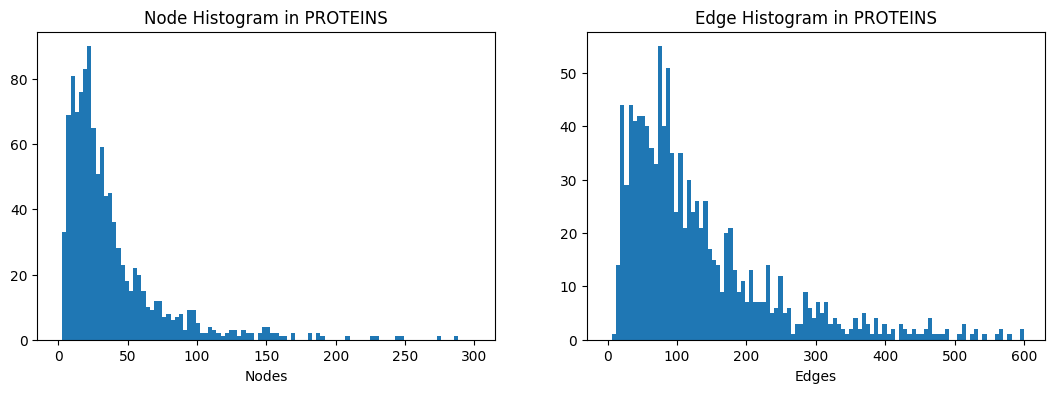

In [ ]:
num_of_nodes = [g.num_nodes for g in proteins]
num_of_edges = [g.num_edges for g in proteins]

plt.figure(figsize=(13,4))

plt.subplot(1,2,1)
plt.hist(num_of_nodes, range=(0,300), bins=100)
plt.xlabel("Nodes")
plt.title("Node Histogram in PROTEINS")

plt.subplot(1,2,2)
plt.hist(num_of_edges, range=(0,600), bins=100)
plt.xlabel("Edges")
plt.title("Edge Histogram in PROTEINS")

plt.show()

Some further examples of useful utility functions per graph or even for the whole dataset:

In [ ]:
proteins[0].has_isolated_nodes()

False

In [ ]:
proteins[0].has_self_loops()

False

In [ ]:
proteins[0].is_directed()

False

In [ ]:
proteins.num_classes

2

Dataset-wise characteristics like the entirety of labels are also available.

In [ ]:
proteins.y

tensor([0, 0, 0,  ..., 1, 1, 1])

### Loading custom data

If you have a custom dataset that is not offered in PyG, you can create your own Dataset object using this [tutorial](https://pytorch-geometric.readthedocs.io/en/latest/tutorial/create_dataset.html).

However, it is often easier to skip the definition of an entire dataset and work with Data objects for each graph. If you are already working with networkx you can automatically convert graphs to PyG format using torch_geometric.utils.convert.from_networkx.


In [ ]:
from torch_geometric.utils.convert import from_networkx

from_networkx(G)

Data(edge_index=[2, 10], gender=[5], relationship=[10], num_nodes=5)

Note that if features were attached to the networkx graph, they would also transfer to the Data object and we would see additional attributes.

## GraKeL

An important graph measure if the similarity between graph instances. Graph kernels are a class of machine learning techniques used for analyzing and comparing structured data, such as graphs and networks.

GraKeL (Graph Kernels Library), is an open-source Python library specifically designed for working with graph kernels. It provides a wide range of graph kernel methods, which are used to measure similarity or dissimilarity between graphs. Some common use cases for graph kernels include graph classification, matching, clustering and regression.

In this example we will demonstrate the capabilities of graph kernels on the classification of PROTEINS graphs when combined with traditional machine learning.

The idea is to design kernels instead of feature vectors, i.e. use the similarity matrix obtained through kernel computation instead of the feature matrix to make graph-level predictions.

A kernel $K(G, G') \in \mathbb{R}$ measures the similarity between data. The kernel matrix $K = K(G, G')$ must always be positive semidefinite, meaning it has positive eigenvalues. There exists a feature representation $\phi(\cdot)$ such that $K(G, G') = \phi(G)^T \phi(G')$. Once the kernel is defined, off-the-shelf machine learning models, such as kernel SVM, can be used to make predictions.

GraKeL offers built-in functions to convert networkx graphs to the appropriate format. To this end, we utilize PyG built-in functionalities to convert proteins from Data objects to networkx graphs and then networkx graphs to GraKeL format.

In [ ]:
from torch_geometric.utils import to_networkx
from sklearn.model_selection import train_test_split
from grakel import graph_from_networkx

# Conversion from PyG to NetworkX
proteins_networkx = [to_networkx(g, node_attrs=["x"]) for g in proteins]
proteins_classes = proteins.y

In [ ]:
# Transform node attribute from one-hot to a single Label, because most Graph Kernels don't accept un-hashable features (e.g. lists)
def label_map(one_hot_vector):
  return np.where(np.array(one_hot_vector).astype(int) == 1)[0][0]

for graph in proteins_networkx:
  new_node_labels = {k: label_map(v) for k,v in dict(graph.nodes(data='x')).items()}
  nx.set_node_attributes(graph, new_node_labels, "node_type")

In [ ]:
# Split Train/Test
G_train, G_test, y_train, y_test = train_test_split(proteins_networkx, proteins_classes, test_size=0.3, random_state=42, stratify=proteins_classes)

# Convert the graphs to grakel.Graph objects, with the new Node Label that we created above
G_train_grakel = list(graph_from_networkx(G_train, node_labels_tag="node_type"))
G_test_grakel = list(graph_from_networkx(G_test, node_labels_tag="node_type"))


The kernels we will evaluate are the Weisfeiler Lehman, Graphlet and Shortest path kernel.

The **Weisfeiler-Lehman (WL) Kernel** is particularly effective for capturing the local structure of graphs. It measures graph similarity by iteratively refining node labels based on the labels of neighboring nodes. The kernel equation for graphs $G$ and $G'$ is defined as:

$K_{\text{WL}}(G, G') = \phi(G)^T \phi(G')$

Here, $\phi(G)$ represents the feature representation of graph $G$. The Weisfeiler-Lehman kernel is extensively used in chemoinformatics, where it helps classify chemical compounds based on their molecular structures. Its iterative label refinement captures subtle structural information in graphs, making it well-suited for such tasks.
<br>
<br>


The **Graphlet Kernel** focuses on capturing the frequencies of small, connected subgraphs known as graphlets. The kernel equation for graphs $G$ and $G'$ is defined as:

$K_{\text{Graphlet}}(G, G') = \sum_{\text{graphlets } H} \frac{f_H(G) \cdot f_H(G')}{h_H}$

Here, $f_H(G)$ represents the count of graphlet $H$ in graph $G$, and $h_H$ is the number of automorphisms of graphlet $H$. This kernel is commonly applied in network analysis tasks, including identifying structural similarities in complex networks and characterizing protein-protein interaction networks. It excels at capturing local graph structures.
<br>
<br>

The **Shortest Path Kernel** assesses graph similarity by comparing the lengths of shortest paths between pairs of nodes in the graphs. The kernel equation for graphs $G$ and $G'$ is defined as:


$K_{\text{ShortestPath}}(G_i, G_j) = \sum_{e_i \in E_i} \sum_{e_j \in E_j} k^{(1)}_{\text{walk}}(e_i, e_j)$


In this equation, $k^{(1)}_{\text{walk}}(e_i, e_j)$ is a positive semidefinite kernel on edge walks of length 1 (compare both the lengths of the shortest paths corresponding to edges, and the labels of their endpoint vertices). The Shortest Path kernel is frequently used in bioinformatics, particularly for comparing protein-protein interaction networks. It quantifies structural similarities based on the connectivity of nodes via the shortest paths, making it a valuable tool for this domain.

In [ ]:
from grakel.kernels import WeisfeilerLehman, ShortestPath, GraphletSampling

# Initialize Graph Kernels
wl_kernel = WeisfeilerLehman(n_iter=10, normalize=True, n_jobs=-1) #stops after 10 iterations of the WL isomorphism test
sp_kernel = ShortestPath(normalize=True)
gs_kernel = GraphletSampling(k=3, normalize=True)                  #k represents size of graphlets, no random sampling is used because graphs are not large

We can play with kernel hyperparameters, but due to the average size of the graphs the numbers above are satisfactory.

We fit each kernel with the training set of graphs and use the similarity matrix as features for training the SVM classifier. Predictions are computed for the test set using the fitted kenrnel and SVC to ultimately obtain accuracy scores.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train/Inference of each kernel, using linear SVM classifier

kernels = [("Weisfeiler-Lehman", wl_kernel), ("Shortest-Path", sp_kernel), ("Graphlet-Sampling", gs_kernel)]

for kernel_name, kernel in kernels:
  K_train = kernel.fit_transform(G_train_grakel)
  K_test = kernel.transform(G_test_grakel)

  clf = SVC(kernel='precomputed')
  clf.fit(K_train, y_train)

  y_pred = clf.predict(K_test)
  score = accuracy_score(y_test, y_pred)

  print(f"{kernel_name} Kernel achieved Accuracy: {score*100:.2f}%\n")

Weisfeiler-Lehman Kernel achieved Accuracy: 72.46%

Shortest-Path Kernel achieved Accuracy: 74.85%

Graphlet-Sampling Kernel achieved Accuracy: 62.57%

